In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pickle

In [3]:
data = pd.read_csv('combined_news.csv')


In [4]:
data['text'] = data['text'] + ' ' + data['title']
X = data['text']
y = data['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [6]:
#Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [10]:
import os
os.makedirs('../models', exist_ok=True)

In [11]:
with open('../models/logistic_model.pkl','wb') as file:
  pickle.dump(model, file)

with open('../models/vectorizer.pkl', 'wb') as file:
  pickle.dump(vectorizer, file)

In [12]:
#model evalution
y_pred = model.predict(X_test_tfidf)
y_pred_prob = model.predict_proba(X_test_tfidf)[:,1]

In [13]:
print(classification_report(y_test,y_pred))
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4723
           1       0.98      0.99      0.99      4255

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978

[[4659   64]
 [  53 4202]]


In [14]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

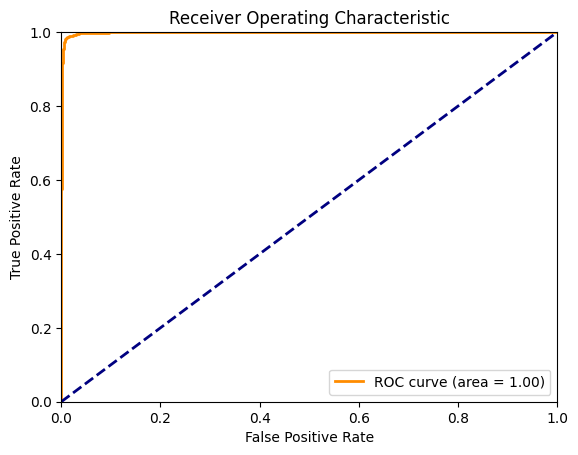

In [15]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color = 'navy', lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()